In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import plotly.express as ex
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score

In [3]:
sp500 = yf.Ticker("^GSPC")

In [4]:
sp500 = sp500.history(period="max")

In [5]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,0.0,0.0
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,0.0,0.0
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,0.0,0.0


In [6]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-06-21 00:00:00-04:00', '2024-06-24 00:00:00-04:00',
               '2024-06-25 00:00:00-04:00', '2024-06-26 00:00:00-04:00',
               '2024-06-27 00:00:00-04:00', '2024-06-28 00:00:00-04:00',
               '2024-07-01 00:00:00-04:00', '2024-07-02 00:00:00-04:00',
               '2024-07-03 00:00:00-04:00', '2024-07-05 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24243, freq=None)

<Axes: xlabel='Date'>

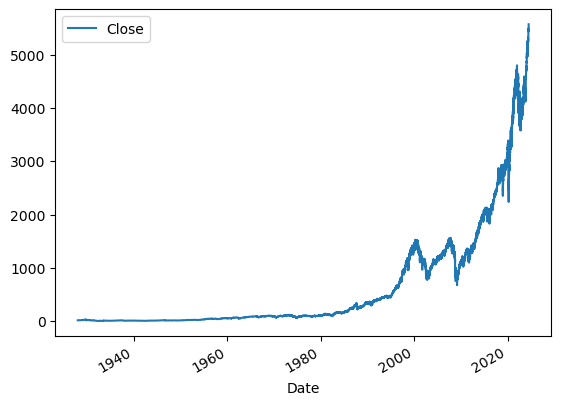

In [7]:
sp500.plot.line(y="Close", use_index=True)

In [8]:
del sp500['Dividends']
del sp500['Stock Splits']

In [9]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [10]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,5475.089844
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,5509.009766
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,5537.020020


In [11]:
#target counts when tmrow s price is higher than today, if it 0, it means it goes down.
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)


In [12]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,5475.089844,1
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,5509.009766,1
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,5537.020020,1


In [13]:
#to see data from 1990
#copy() for warming
sp500 = sp500.loc["1990-01-01":].copy()

In [14]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,5475.089844,1
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,5509.009766,1
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,5537.020020,1


In [15]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [16]:
preds = model.predict(test[predictors])

In [17]:
preds = pd.Series(preds, index=test.index)

In [18]:
preds

Date
2024-02-12 00:00:00-05:00    0
2024-02-13 00:00:00-05:00    1
2024-02-14 00:00:00-05:00    1
2024-02-15 00:00:00-05:00    1
2024-02-16 00:00:00-05:00    0
                            ..
2024-06-28 00:00:00-04:00    0
2024-07-01 00:00:00-04:00    0
2024-07-02 00:00:00-04:00    0
2024-07-03 00:00:00-04:00    1
2024-07-05 00:00:00-04:00    0
Length: 100, dtype: int64

In [19]:
precision_score(test["Target"], preds)

0.5789473684210527

In [20]:
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

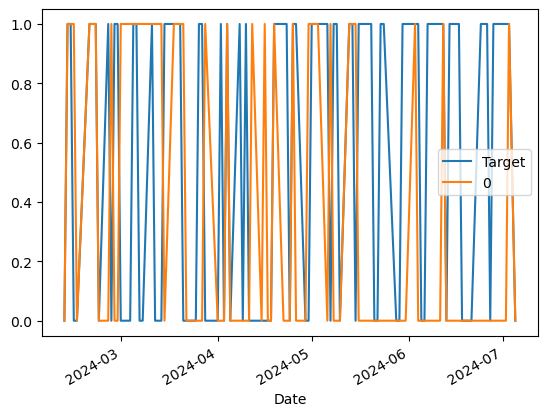

In [21]:
combined.plot()

In [22]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [23]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [24]:
predictions= backtest(sp500, model, predictors)

In [26]:
predictions["Predictions"].value_counts()

Predictions
0    3597
1    2596
Name: count, dtype: int64

In [27]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [29]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.535282
0    0.464718
Name: count, dtype: float64

In [30]:
horizons = [2, 5, 60, 250, 100]

In [31]:
new_predictors = []
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]
    

In [32]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_100,Trend_100
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,5475.089844,1,0.997954,1.0,0.998682,3.0,1.040500,34.0,1.140228,140.0,1.051345,56.0
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,5509.009766,1,1.001336,1.0,1.000358,4.0,1.042198,35.0,1.142306,140.0,1.053102,56.0
2024-07-02 00:00:00-04:00,5461.839844,5509.689941,5458.430176,5509.009766,3329950000,5537.020020,1,1.003088,2.0,1.005098,4.0,1.047643,35.0,1.148365,141.0,1.058579,56.0


In [33]:
sp500 = sp500.dropna()

In [34]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_100,Trend_100
Date,,,,,,,,,,,,,,,,,
1990-12-27 00:00:00-05:00,330.850006,331.040009,328.230011,328.290009,102900000,328.720001,1,0.996116,1.0,0.994270,2.0,1.038297,31.0,0.981221,132.0,1.031883,52.0
1990-12-28 00:00:00-05:00,328.290009,328.720001,327.239990,328.720001,111030000,330.220001,1,1.000654,1.0,0.996417,3.0,1.038708,32.0,0.982859,133.0,1.033433,52.0
1990-12-31 00:00:00-05:00,328.709991,330.230011,327.500000,330.220001,114130000,326.450012,0,1.002276,2.0,1.001893,3.0,1.042486,32.0,0.987644,134.0,1.038415,52.0
1991-01-02 00:00:00-05:00,330.200012,330.750000,326.450012,326.450012,126280000,321.910004,0,0.994259,1.0,0.992533,3.0,1.029774,32.0,0.976670,134.0,1.026995,51.0
1991-01-03 00:00:00-05:00,326.459991,326.529999,321.899994,321.910004,141450000,321.000000,0,0.992998,0.0,0.984079,2.0,1.015003,31.0,0.963454,133.0,1.013146,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27 00:00:00-04:00,5473.589844,5490.810059,5467.540039,5482.870117,3589530000,5460.479980,0,1.000453,2.0,1.002626,3.0,1.045593,35.0,1.145870,141.0,1.056709,56.0
2024-06-28 00:00:00-04:00,5488.479980,5523.640137,5451.120117,5460.479980,7199220000,5475.089844,1,0.997954,1.0,0.998682,3.0,1.040500,34.0,1.140228,140.0,1.051345,56.0
2024-07-01 00:00:00-04:00,5471.080078,5479.549805,5446.529785,5475.089844,3488760000,5509.009766,1,1.001336,1.0,1.000358,4.0,1.042198,35.0,1.142306,140.0,1.053102,56.0


In [35]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [38]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [39]:
predictions = backtest(sp500, model, new_predictors)

In [40]:
predictions['Predictions'].value_counts()

Predictions
0.0    5036
1.0     906
Name: count, dtype: int64

In [41]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5618101545253863